## Investigate model predictions

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import os

import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [7]:
DATA_ROOT='/media/mike/internal/agnfinder'

In [8]:
!ls {DATA_ROOT}

clumpy_models_201410_tvavg.hdf5        LIBRARY_XXLN_Spirals.lib.dat.fits
CPz_filters			       LIBRARY_XXLN_Starburst.lib.dat.fits
cpz_paper_sample.parquet	       LIBRARY_XXLN_Starburst.parquet
cpz_paper_sample_week3.parquet	       photometry_simulation.hdf5
fsps_cache.hdf5			       README
LIBRARY_STAR_XXL_North.dat.fits        results
LIBRARY_XXLN_AGN.lib.dat.fits	       SMC_prevot.dat
LIBRARY_XXLN_Ellipticals.lib.dat.fits  uK_IR_final.fits
LIBRARY_XXLN_QSO.lib.dat.fits	       uK_IR_week3.fits


# Visualise Observed Galaxies

In [9]:
parquet_loc = os.path.join(DATA_ROOT, 'cpz_paper_sample_week3.parquet')

In [10]:
# save to parquet for quick reading, including of specific columns
if not os.path.isfile(parquet_loc):
    df = Table.read(os.path.join(DATA_ROOT, 'uK_IR_week3.fits')).to_pandas()
    df.replace(-99, np.nan, inplace=True)
    df.to_parquet(parquet_loc)

In [11]:
metadata_cols = ['id', 'alpha', 'delta', 'redshift', 'hclass', 'hquality',
       'survey_quality', 'survey_comment', 'sp_survey']

In [12]:
case_cols = ['CASE_I_a0_01', 'CASE_I_a0_001', 'CASE_I_a0', 'CASE_II_a0_05',
       'CASE_II_a0_01', 'CASE_II_a0_001', 'CASE_II_a0', 'CASE_II_b0_05',
       'CASE_II_b0_01', 'CASE_II_b0_001', 'CASE_II_b0', 'CASE_III_a0_05',
       'CASE_III_a0_01', 'CASE_III_a0_001', 'CASE_III_a0',
       'CASE_III_b0_05', 'CASE_III_b0_01', 'CASE_III_b0_001',
       'CASE_III_b0', 'CASE_III_c0_05', 'CASE_III_c0_01',
       'CASE_III_c0_001', 'CASE_III_c0', 'CASE_III_d0_05',
       'CASE_III_d0_01', 'CASE_III_d0_001', 'CASE_III_d0']

In [13]:
unified_cols = ['fuv', 'nuv',
       'u', 'g', 'r', 'i', 'z', 'y', 'j', 'h', 'k', 'w1', 'w2', 'w3',
       'w4', 'fuv3', 'nuv3', 'u3', 'g3', 'r3', 'i3', 'z3', 'y3', 'j3',
       'h3', 'k3', 'fuv_err', 'nuv_err', 'u_err', 'g_err', 'r_err',
       'i_err', 'z_err', 'y_err', 'j_err', 'h_err', 'k_err', 'w1_err',
       'w2_err', 'w3_err', 'w4_err', 'fuv3_err', 'nuv3_err', 'u3_err',
       'g3_err', 'r3_err', 'i3_err', 'z3_err', 'y3_err', 'j3_err',
       'h3_err', 'k3_err', 'u_hlr', 'g_hlr', 'r_hlr', 'i_hlr', 'z_hlr',
       'y_hlr', 'j_hlr', 'h_hlr', 'k_hlr']  # what is hlr?

In [14]:
sdss_cols = ['id_sdss_u_dr12',
       'tile_name_sdss_u_dr12', 'alpha_sdss_u_dr12', 'delta_sdss_u_dr12',
       'flags_sdss_u_dr12', 'flux_radius_sdss_u_dr12', 'fwhm_sdss_u_dr12',
       'mag_auto_sdss_u_dr12', 'magerr_auto_sdss_u_dr12',
       'mag_aper2_sdss_u_dr12', 'magerr_aper2_sdss_u_dr12',
       'mag_aper3_sdss_u_dr12', 'magerr_aper3_sdss_u_dr12',
       'id_sdss_g_dr12', 'tile_name_sdss_g_dr12', 'alpha_sdss_g_dr12',
       'delta_sdss_g_dr12', 'flags_sdss_g_dr12',
       'flux_radius_sdss_g_dr12', 'fwhm_sdss_g_dr12',
       'mag_auto_sdss_g_dr12', 'magerr_auto_sdss_g_dr12',
       'mag_aper2_sdss_g_dr12', 'magerr_aper2_sdss_g_dr12',
       'mag_aper3_sdss_g_dr12', 'magerr_aper3_sdss_g_dr12',
       'id_sdss_r_dr12', 'tile_name_sdss_r_dr12', 'alpha_sdss_r_dr12',
       'delta_sdss_r_dr12', 'flags_sdss_r_dr12',
       'flux_radius_sdss_r_dr12', 'fwhm_sdss_r_dr12',
       'mag_auto_sdss_r_dr12', 'magerr_auto_sdss_r_dr12',
       'mag_aper2_sdss_r_dr12', 'magerr_aper2_sdss_r_dr12',
       'mag_aper3_sdss_r_dr12', 'magerr_aper3_sdss_r_dr12',
       'id_sdss_i_dr12', 'tile_name_sdss_i_dr12', 'alpha_sdss_i_dr12',
       'delta_sdss_i_dr12', 'flags_sdss_i_dr12',
       'flux_radius_sdss_i_dr12', 'fwhm_sdss_i_dr12',
       'mag_auto_sdss_i_dr12', 'magerr_auto_sdss_i_dr12',
       'mag_aper2_sdss_i_dr12', 'magerr_aper2_sdss_i_dr12',
       'mag_aper3_sdss_i_dr12', 'magerr_aper3_sdss_i_dr12',
       'id_sdss_z_dr12', 'tile_name_sdss_z_dr12', 'alpha_sdss_z_dr12',
       'delta_sdss_z_dr12', 'flags_sdss_z_dr12',
       'flux_radius_sdss_z_dr12', 'fwhm_sdss_z_dr12',
       'mag_auto_sdss_z_dr12', 'magerr_auto_sdss_z_dr12',
       'mag_aper2_sdss_z_dr12', 'magerr_aper2_sdss_z_dr12',
       'mag_aper3_sdss_z_dr12', 'magerr_aper3_sdss_z_dr12']

### For convenience, define groups of columns

In [15]:
"""
Schema:
- IDENT: unique id?
- Z_BEST: best matching template from library
- Z_BEST68_{LOW}{HIGH}: solutions for 68% confidence (chi-squared = 1.0) in z likelihood from template
- Z_ML: "Zphot from Median of ML distribution"
- CHI_BEST: lowest chi-squared value from template fit
- MOD_BEST: index of best-fitting template?
- EXTLAW_BEST: index of best extinction law?
- EBV_BEST: Extinction value?
- MAG_ABS: Absolute magnitude (over all bands?) of best-fitting template?
- PDZ_BEST: Integrated template probability between z_best +/- 0.1(1+z)
- SCALE_BEST: "Scaling factor", presumably a free param. to scale the template from normalised form to match the observed mags.
- DIST_MOD_BEST: Distance modulus ('DM') of best-fitting template
Suffix: template library used
"""

template_cols_all_models = [
    'IDENT_ALL_MODELS', 'Z_BEST_ALL_MODELS', 'Z_BEST68_LOW_ALL_MODELS',
       'Z_BEST68_HIGH_ALL_MODELS', 'Z_ML_ALL_MODELS',
       'CHI_BEST_ALL_MODELS', 'MOD_BEST_ALL_MODELS',
       'EXTLAW_BEST_ALL_MODELS', 'EBV_BEST_ALL_MODELS',
       'MAG_ABS_BEST_ALL_MODELS', 'PDZ_BEST_ALL_MODELS',
       'SCALE_BEST_ALL_MODELS', 'DIST_MOD_BEST_ALL_MODELS',
       'NBAND_USED_ALL_MODELS', 'Z_SEC_ALL_MODELS', 'CHI_SEC_ALL_MODELS',
       'MOD_SEC_ALL_MODELS', 'MOD_STAR_ALL_MODELS', 'CHI_STAR_ALL_MODELS',
       'CONTEXT_ALL_MODELS', 'ZSPEC_ALL_MODELS']

template_cols_passive = [
    'IDENT_PASSIVE_pure',
       'Z_BEST_PASSIVE_pure', 'Z_BEST68_LOW_PASSIVE_pure',
       'Z_BEST68_HIGH_PASSIVE_pure', 'Z_ML_PASSIVE_pure',
       'CHI_BEST_PASSIVE_pure', 'MOD_BEST_PASSIVE_pure',
       'EXTLAW_BEST_PASSIVE_pure', 'EBV_BEST_PASSIVE_pure',
       'MAG_ABS_BEST_PASSIVE_pure', 'PDZ_BEST_PASSIVE_pure',
       'SCALE_BEST_PASSIVE_pure', 'DIST_MOD_BEST_PASSIVE_pure',
       'NBAND_USED_PASSIVE_pure', 'Z_SEC_PASSIVE_pure',
       'CHI_SEC_PASSIVE_pure', 'MOD_SEC_PASSIVE_pure',
       'MOD_STAR_PASSIVE_pure', 'CHI_STAR_PASSIVE_pure',
       'CONTEXT_PASSIVE_pure', 'ZSPEC_PASSIVE_pure']

template_cols_starforming = [
       'IDENT_STARFORMING_pure', 'Z_BEST_STARFORMING_pure',
       'Z_BEST68_LOW_STARFORMING_pure', 'Z_BEST68_HIGH_STARFORMING_pure',
       'Z_ML_STARFORMING_pure', 'CHI_BEST_STARFORMING_pure',
       'MOD_BEST_STARFORMING_pure', 'EXTLAW_BEST_STARFORMING_pure',
       'EBV_BEST_STARFORMING_pure', 'MAG_ABS_BEST_STARFORMING_pure',
       'PDZ_BEST_STARFORMING_pure', 'SCALE_BEST_STARFORMING_pure',
       'DIST_MOD_BEST_STARFORMING_pure', 'NBAND_USED_STARFORMING_pure',
       'Z_SEC_STARFORMING_pure', 'CHI_SEC_STARFORMING_pure',
       'MOD_SEC_STARFORMING_pure', 'MOD_STAR_STARFORMING_pure',
       'CHI_STAR_STARFORMING_pure', 'CONTEXT_STARFORMING_pure',
       'ZSPEC_STARFORMING_pure']

template_cols_extreme_starforming = [
    'IDENT_EXTREME_STARFORMING_pure',
       'Z_BEST_EXTREME_STARFORMING_pure',
       'Z_BEST68_LOW_EXTREME_STARFORMING_pure',
       'Z_BEST68_HIGH_EXTREME_STARFORMING_pure',
       'Z_ML_EXTREME_STARFORMING_pure',
       'CHI_BEST_EXTREME_STARFORMING_pure',
       'MOD_BEST_EXTREME_STARFORMING_pure',
       'EXTLAW_BEST_EXTREME_STARFORMING_pure',
       'EBV_BEST_EXTREME_STARFORMING_pure',
       'MAG_ABS_BEST_EXTREME_STARFORMING_pure',
       'PDZ_BEST_EXTREME_STARFORMING_pure',
       'SCALE_BEST_EXTREME_STARFORMING_pure',
       'DIST_MOD_BEST_EXTREME_STARFORMING_pure',
       'NBAND_USED_EXTREME_STARFORMING_pure',
       'Z_SEC_EXTREME_STARFORMING_pure',
       'CHI_SEC_EXTREME_STARFORMING_pure',
       'MOD_SEC_EXTREME_STARFORMING_pure',
       'MOD_STAR_EXTREME_STARFORMING_pure',
       'CHI_STAR_EXTREME_STARFORMING_pure',
       'CONTEXT_EXTREME_STARFORMING_pure',
       'ZSPEC_EXTREME_STARFORMING_pure']

template_cols_agn = ['IDENT_AGN_pure',
       'Z_BEST_AGN_pure', 'Z_BEST68_LOW_AGN_pure',
       'Z_BEST68_HIGH_AGN_pure', 'Z_ML_AGN_pure', 'CHI_BEST_AGN_pure',
       'MOD_BEST_AGN_pure', 'EXTLAW_BEST_AGN_pure', 'EBV_BEST_AGN_pure',
       'MAG_ABS_BEST_AGN_pure', 'PDZ_BEST_AGN_pure',
       'SCALE_BEST_AGN_pure', 'DIST_MOD_BEST_AGN_pure',
       'NBAND_USED_AGN_pure', 'Z_SEC_AGN_pure', 'CHI_SEC_AGN_pure',
       'MOD_SEC_AGN_pure', 'MOD_STAR_AGN_pure', 'CHI_STAR_AGN_pure',
       'CONTEXT_AGN_pure', 'ZSPEC_AGN_pure']

template_cols_qso_pure = ['IDENT_QSO_pure',
       'Z_BEST_QSO_pure', 'Z_BEST68_LOW_QSO_pure',
       'Z_BEST68_HIGH_QSO_pure', 'Z_ML_QSO_pure', 'CHI_BEST_QSO_pure',
       'MOD_BEST_QSO_pure', 'EXTLAW_BEST_QSO_pure', 'EBV_BEST_QSO_pure',
       'MAG_ABS_BEST_QSO_pure', 'PDZ_BEST_QSO_pure',
       'SCALE_BEST_QSO_pure', 'DIST_MOD_BEST_QSO_pure',
       'NBAND_USED_QSO_pure', 'Z_SEC_QSO_pure', 'CHI_SEC_QSO_pure',
       'MOD_SEC_QSO_pure', 'MOD_STAR_QSO_pure', 'CHI_STAR_QSO_pure',
       'CONTEXT_QSO_pure', 'ZSPEC_QSO_pure']

template_cols_star = ['IDENT_STAR', 'Z_BEST_STAR',
       'Z_BEST68_LOW_STAR', 'Z_BEST68_HIGH_STAR', 'Z_ML_STAR',
       'CHI_BEST_STAR', 'MOD_BEST_STAR', 'EXTLAW_BEST_STAR',
       'EBV_BEST_STAR', 'MAG_ABS_BEST_STAR', 'PDZ_BEST_STAR',
       'SCALE_BEST_STAR', 'DIST_MOD_BEST_STAR', 'NBAND_USED_STAR',
       'Z_SEC_STAR', 'CHI_SEC_STAR', 'MOD_SEC_STAR', 'MOD_STAR_STAR',
       'CHI_STAR_STAR', 'CONTEXT_STAR', 'ZSPEC_STAR']

template_cols_galaxies = ['IDENT_GALAXIES',
       'Z_BEST_GALAXIES', 'Z_BEST68_LOW_GALAXIES',
       'Z_BEST68_HIGH_GALAXIES', 'Z_ML_GALAXIES', 'CHI_BEST_GALAXIES',
       'MOD_BEST_GALAXIES', 'EXTLAW_BEST_GALAXIES', 'EBV_BEST_GALAXIES',
       'MAG_ABS_BEST_GALAXIES', 'PDZ_BEST_GALAXIES',
       'SCALE_BEST_GALAXIES', 'DIST_MOD_BEST_GALAXIES',
       'NBAND_USED_GALAXIES', 'Z_SEC_GALAXIES', 'CHI_SEC_GALAXIES',
       'MOD_SEC_GALAXIES', 'MOD_STAR_GALAXIES', 'CHI_STAR_GALAXIES',
       'CONTEXT_GALAXIES', 'ZSPEC_GALAXIES']

template_cols_agn = ['IDENT_AGN', 'Z_BEST_AGN',
       'Z_BEST68_LOW_AGN', 'Z_BEST68_HIGH_AGN', 'Z_ML_AGN',
       'CHI_BEST_AGN', 'MOD_BEST_AGN', 'EXTLAW_BEST_AGN', 'EBV_BEST_AGN',
       'MAG_ABS_BEST_AGN', 'PDZ_BEST_AGN', 'SCALE_BEST_AGN',
       'DIST_MOD_BEST_AGN', 'NBAND_USED_AGN', 'Z_SEC_AGN', 'CHI_SEC_AGN',
       'MOD_SEC_AGN', 'MOD_STAR_AGN', 'CHI_STAR_AGN', 'CONTEXT_AGN',
       'ZSPEC_AGN']

# what's the difference between these and qso_pure?
template_cols_qso_impure = ['IDENT_QSO', 'Z_BEST_QSO', 'Z_BEST68_LOW_QSO',
       'Z_BEST68_HIGH_QSO', 'Z_ML_QSO', 'CHI_BEST_QSO', 'MOD_BEST_QSO',
       'EXTLAW_BEST_QSO', 'EBV_BEST_QSO', 'MAG_ABS_BEST_QSO',
       'PDZ_BEST_QSO', 'SCALE_BEST_QSO', 'DIST_MOD_BEST_QSO',
       'NBAND_USED_QSO', 'Z_SEC_QSO', 'CHI_SEC_QSO', 'MOD_SEC_QSO',
       'MOD_STAR_QSO', 'CHI_STAR_QSO', 'CONTEXT_QSO', 'ZSPEC_QSO']

# what's the difference betwen these and STARFORMING?
template_cols_starforming_v2 = [
       'IDENT_starforming', 'Z_BEST_starforming',
       'Z_BEST68_LOW_starforming', 'Z_BEST68_HIGH_starforming',
       'Z_ML_starforming', 'CHI_BEST_starforming', 'MOD_BEST_starforming',
       'EXTLAW_BEST_starforming', 'EBV_BEST_starforming',
       'MAG_ABS_BEST_starforming', 'PDZ_BEST_starforming',
       'SCALE_BEST_starforming', 'DIST_MOD_BEST_starforming',
       'NBAND_USED_starforming', 'Z_SEC_starforming',
       'CHI_SEC_starforming', 'MOD_SEC_starforming',
       'MOD_STAR_starforming', 'CHI_STAR_starforming',
       'CONTEXT_starforming', 'ZSPEC_starforming']

z_errors_vs_spectro = ['Dz_ALL_MODELS',
       'Dz_GALAXIES', 'Dz_AGN', 'Dz_QSO', 'Dz_PASSIVE_pure',
       'Dz_STARFORMING_pure', 'Dz_EXTREME_STARFORMING_pure',
       'Dz_starforming', 'Dz_AGN_pure']

In [16]:
df = pd.read_parquet(parquet_loc, columns=metadata_cols + unified_cols)
# df = pd.read_parquet(parquet_loc)

In [17]:
df.columns.values

array(['id', 'alpha', 'delta', 'redshift', 'hclass', 'hquality',
       'survey_quality', 'survey_comment', 'sp_survey', 'fuv', 'nuv', 'u',
       'g', 'r', 'i', 'z', 'y', 'j', 'h', 'k', 'w1', 'w2', 'w3', 'w4',
       'fuv3', 'nuv3', 'u3', 'g3', 'r3', 'i3', 'z3', 'y3', 'j3', 'h3',
       'k3', 'fuv_err', 'nuv_err', 'u_err', 'g_err', 'r_err', 'i_err',
       'z_err', 'y_err', 'j_err', 'h_err', 'k_err', 'w1_err', 'w2_err',
       'w3_err', 'w4_err', 'fuv3_err', 'nuv3_err', 'u3_err', 'g3_err',
       'r3_err', 'i3_err', 'z3_err', 'y3_err', 'j3_err', 'h3_err',
       'k3_err', 'u_hlr', 'g_hlr', 'r_hlr', 'i_hlr', 'z_hlr', 'y_hlr',
       'j_hlr', 'h_hlr', 'k_hlr'], dtype=object)

In [18]:
df['hclass'].value_counts()

-1    25343
 1    11369
 3     4192
 2      495
Name: hclass, dtype: int64

In [23]:
hclass_schema = {
    -1: np.nan,
    1: 'galaxy',
    2: 'agn',
    3: 'qso'
}

In [24]:
df['spectroscopic_label'] = df['hclass'].apply(lambda x: hclass_schema[x])

In [25]:
df['spectroscopic_label'].value_counts()

galaxy    11369
qso        4192
agn         495
Name: spectroscopic_label, dtype: int64

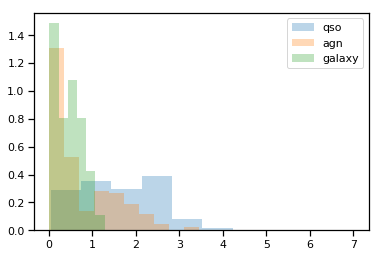

In [41]:
plt.hist(df[df['spectroscopic_label'] == 'qso']['redshift'], density=True, alpha=0.3, label='qso')
plt.hist(df[df['spectroscopic_label'] == 'agn']['redshift'], density=True, alpha=0.3, label='agn')
plt.hist(df[df['spectroscopic_label'] == 'galaxy']['redshift'], density=True, alpha=0.3, label='galaxy')
plt.legend()